In [1]:
# This notebook is used to test double_dot scripts
%reset
import imp
import dd
import sys
sys.path.append('/Users/ssk4/quantum-ml/nanowire_model')
import physics
import potential_profile
import markov
import exceptions
import thomas_fermi
imp.reload(physics)
imp.reload(potential_profile)
imp.reload(markov)
imp.reload(exceptions)
imp.reload(thomas_fermi)

imp.reload(dd)

print(dd.calculate_2d_map())



Once deleted, variables cannot be recovered. Proceed (y/[n])? y
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
55.5530948638916


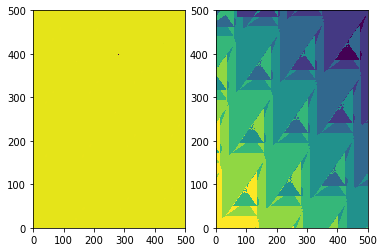

In [2]:
import numpy as np
dat = np.load('/Users/ssk4/data/double_dot_test.npy').item()

import matplotlib.pyplot as plt
%matplotlib inline

curr_map = np.array([x['current'] for x in dat['output']]).reshape((len(dat['input']['V_d1_vec']),len(dat['input']['V_d2_vec'])))

XX,YY = np.meshgrid(dat['input']['V_d1_vec'],dat['input']['V_d2_vec'])
plt.subplot(1,2,1)

plt.pcolor(curr_map,vmax=1e-3)
plt.subplot(1,2,2)
charge_map = np.array([np.sum(x['charge_state']) for x in dat['output']]).reshape((len(dat['input']['V_d1_vec']),
                                                                                   len(dat['input']['V_d2_vec'])))

XX,YY = np.meshgrid(dat['input']['V_d1_vec'],dat['input']['V_d2_vec'])
plt.pcolor(charge_map)

In [125]:
# This notebook is used to test double_dot 3d scripts
%reset
import imp
import dd
import sys
sys.path.append('/Users/ssk4/quantum-ml/nanowire_model')
import physics
import potential_profile
import markov
import exceptions
import thomas_fermi
imp.reload(physics)
imp.reload(potential_profile)
imp.reload(markov)
imp.reload(exceptions)
imp.reload(thomas_fermi)

imp.reload(dd)

print(dd.calculate_3d_map())

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
1800.0121989250183


In [126]:
import numpy as np
dat = np.load('/Users/ssk4/data/double_dot_3d50_grid_2017-07-08 19:12:11.106115.npy').item()

import matplotlib.pyplot as plt
%matplotlib inline

curr_map = np.array([x['current'] for x in dat['output']]).reshape((len(dat['input']['V_b2_vec']),
                                                                    len(dat['input']['V_b1_vec']),
                                                                    len(dat['input']['V_b3_vec'])))


In [64]:
cc = np.zeros((50,50,50))
for i in range(50):
    for j in range(50):
        for k in range(50):
            cc[k,i,j] = curr_map[j,i,k]
            
            

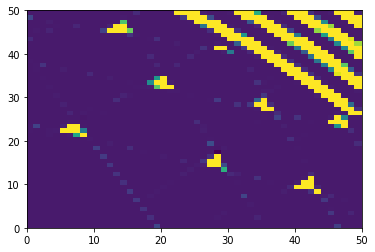

In [146]:
plt.pcolor(curr_map[49],vmax=1e-8)

In [139]:
dat['input']

{'V_b1_vec': array([-0.3       , -0.29693878, -0.29387755, -0.29081633, -0.2877551 ,
        -0.28469388, -0.28163265, -0.27857143, -0.2755102 , -0.27244898,
        -0.26938776, -0.26632653, -0.26326531, -0.26020408, -0.25714286,
        -0.25408163, -0.25102041, -0.24795918, -0.24489796, -0.24183673,
        -0.23877551, -0.23571429, -0.23265306, -0.22959184, -0.22653061,
        -0.22346939, -0.22040816, -0.21734694, -0.21428571, -0.21122449,
        -0.20816327, -0.20510204, -0.20204082, -0.19897959, -0.19591837,
        -0.19285714, -0.18979592, -0.18673469, -0.18367347, -0.18061224,
        -0.17755102, -0.1744898 , -0.17142857, -0.16836735, -0.16530612,
        -0.1622449 , -0.15918367, -0.15612245, -0.15306122, -0.15      ]),
 'V_b2_vec': array([-0.5       , -0.49591837, -0.49183673, -0.4877551 , -0.48367347,
        -0.47959184, -0.4755102 , -0.47142857, -0.46734694, -0.46326531,
        -0.45918367, -0.45510204, -0.45102041, -0.44693878, -0.44285714,
        -0.43877551, -0.4